In [33]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

In [34]:
def gray_histogram(gray_img):

    # Initialize histogram array
    hist = np.zeros(256, dtype=int)

    # Count pixel occurrences using pure NumPy loops
    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            pixel_val = gray_img[i, j]
            hist[pixel_val] += 1

    # Plot histogram
    plt.figure(figsize=(10, 4))
    plt.bar(range(256), hist, width=1, edgecolor='black', linewidth=0.5)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Grayscale Histogram')
    plt.xlim(0, 255)
    plt.show()

    return hist

(np.float64(-0.5), np.float64(1128.5), np.float64(1279.5), np.float64(-0.5))

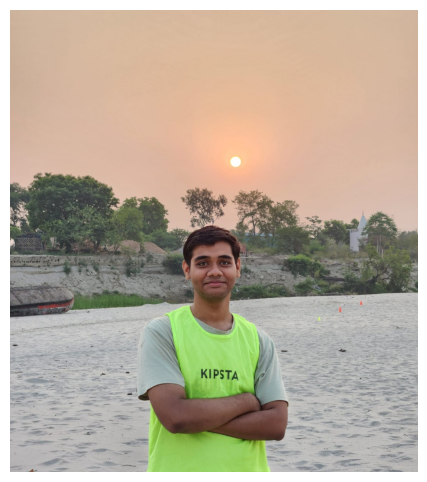

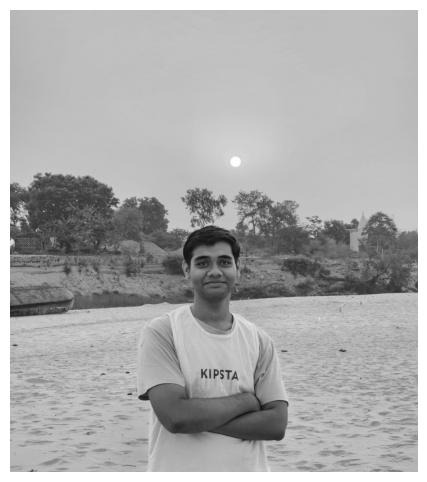

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr=cv2.imread('my_image.jpeg')
img_rgb=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")

img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(img_gray,cmap='gray')
plt.axis('off')

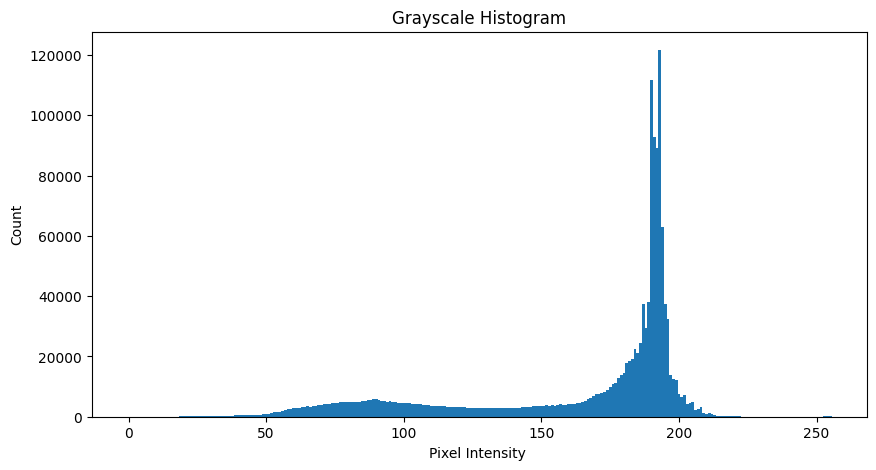

In [36]:
def gray_histogram(img_gray):

    hist_counts = [0] * 256

    rows, cols = img_gray.shape

    for i in range(rows):
        for j in range(cols):
            pixel_val = img_gray[i, j]
            hist_counts[pixel_val] += 1


    plt.figure(figsize=(10, 5))
    plt.bar(range(256), hist_counts, width=1.0)
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity ")
    plt.ylabel("Count")
    plt.show()
gray_histogram(img_gray)

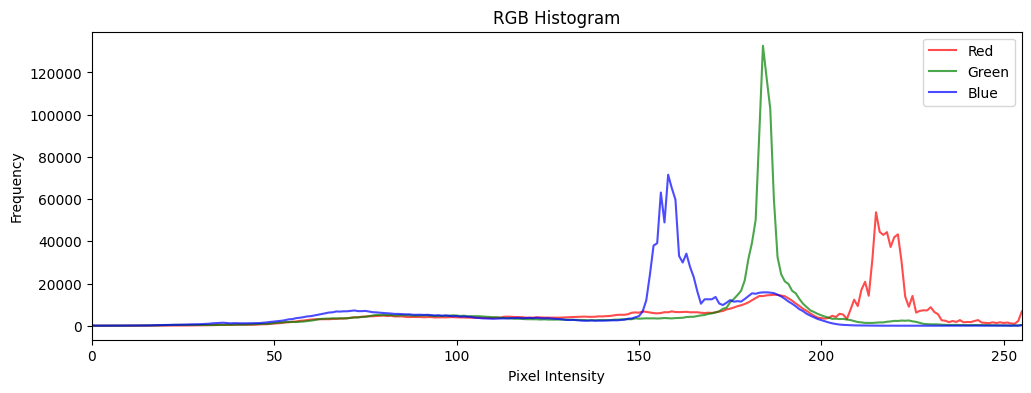

(array([    5,     0,     1,     4,     3,     3,     2,     3,     2,
            1,     3,     2,     7,     5,     3,     8,     7,     8,
           14,    11,    21,    17,    36,    36,    55,    75,   104,
          132,   161,   200,   220,   231,   289,   297,   360,   356,
          359,   440,   446,   459,   475,   503,   460,   507,   450,
          561,   623,   705,   721,   897,  1042,  1148,  1315,  1541,
         1665,  1888,  2010,  2305,  2439,  2657,  2887,  3019,  3076,
         3058,  3086,  3096,  3201,  3277,  3359,  3397,  3501,  3796,
         3974,  4037,  4271,  4331,  4473,  4478,  4607,  4779,  4823,
         4573,  4712,  4416,  4440,  4416,  4228,  4104,  4172,  4122,
         4128,  4016,  4094,  4116,  3926,  3984,  3992,  3964,  4063,
         4083,  3983,  3953,  3958,  3860,  3789,  3869,  3796,  3728,
         3695,  3675,  3731,  3905,  3814,  4240,  4304,  4223,  4179,
         4070,  4058,  3808,  3820,  3846,  3969,  3957,  3847,  3835,
      

In [37]:
def rgb_histogram(img_rgb):

    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    rows, cols, _ = img_rgb.shape
    for i in range(rows):
        for j in range(cols):
            hist_r[img_rgb[i, j, 0]] += 1
            hist_g[img_rgb[i, j, 1]] += 1
            hist_b[img_rgb[i, j, 2]] += 1

    plt.figure(figsize=(12, 4))
    x = range(256)
    plt.plot(x, hist_r, color='red', alpha=0.7, label='Red')
    plt.plot(x, hist_g, color='green', alpha=0.7, label='Green')
    plt.plot(x, hist_b, color='blue', alpha=0.7, label='Blue')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('RGB Histogram')
    plt.legend()
    plt.xlim(0, 255)
    plt.show()

    return hist_r, hist_g, hist_b

rgb_histogram(img_rgb)

In [38]:
def rgb_to_hsv(img_rgb):

    rgb_norm = img_rgb.astype(float) / 255.0
    R, G, B = rgb_norm[:,:,0], rgb_norm[:,:,1], rgb_norm[:,:,2]

    V = np.maximum(np.maximum(R, G), B)

    C = V - np.minimum(np.minimum(R, G), B)  # Chroma
    S = np.where(V != 0, C / V, 0)

    H = np.zeros_like(V)

    mask = (V == R) & (C != 0)
    H[mask] = 60 * (((G[mask] - B[mask]) / C[mask]) % 6)

    mask = (V == G) & (C != 0)
    H[mask] = 60 * (((B[mask] - R[mask]) / C[mask]) + 2)

    mask = (V == B) & (C != 0)
    H[mask] = 60 * (((R[mask] - G[mask]) / C[mask]) + 4)

    hsv_img = np.stack([H, S, V], axis=2)

    return hsv_img


rgb_to_hsv(img_rgb)


array([[[2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        ...,
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01],
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01],
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01]],

       [[2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        ...,
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01],
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01],
        [2.64000000e+01, 2.39234450e-01, 8.19607843e-01]],

       [[2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        [2.81632653e+01, 2.39024390e-01, 8.03921569e-01],
        ...,
        [2.64000000e+01, 2.38095238e-01, 8.23529412e-01],
        [2.64000000e+01, 2.38

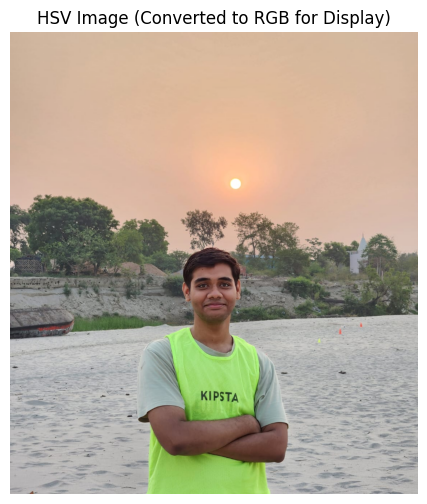

In [39]:

hsv_image = rgb_to_hsv(img_rgb)

rgb_from_hsv = cv2.cvtColor(hsv_image.astype(np.float32), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6,6))
plt.imshow(rgb_from_hsv)
plt.title('HSV Image (Converted to RGB for Display)')
plt.axis('off')
plt.show()

In [40]:
def vintage_filter(img_rgb):

    sepia_matrix = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])

    rows, cols, _ = img_rgb.shape
    filtered = np.zeros_like(img_rgb, dtype=float)

    for i in range(rows):
        for j in range(cols):
            pixel = img_rgb[i, j]
            filtered[i, j] = np.dot(sepia_matrix, pixel)

    filtered = np.clip(filtered, 0, 255).astype(np.uint8)

    center_x, center_y = cols // 2, rows // 2
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center_y)**2 + (j - center_x)**2)
            max_dist = np.sqrt(center_y**2 + center_x**2)
            vignette = 1 - (dist / max_dist) * 0.3
            filtered[i, j] = (filtered[i, j] * vignette).astype(np.uint8)

    return filtered

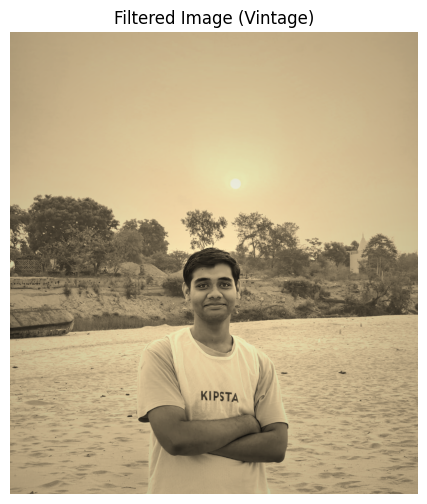

In [41]:
filtered_image = vintage_filter(img_rgb)

plt.figure(figsize=(6,6))
plt.imshow(filtered_image)
plt.title('Filtered Image (Vintage)')
plt.axis('off')
plt.show()

In [42]:
def cool_tone_filter(img_rgb):

    filtered = img_rgb.copy().astype(float)

    filtered[:,:,0] *= 0.8
    filtered[:,:,1] *= 1.1
    filtered[:,:,2] *= 1.3

    filtered = (filtered - 128) * 1.2 + 128

    filtered = np.clip(filtered, 0, 255).astype(np.uint8)

    return filtered

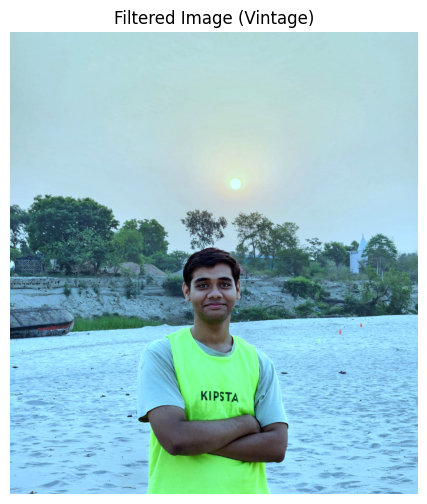

In [43]:
filtered_image = cool_tone_filter(img_rgb)

plt.figure(figsize=(6,6))
plt.imshow(filtered_image)
plt.title('Filtered Image (Vintage)')
plt.axis('off')
plt.show()

In [44]:
def white_balance(img_rgb, value):

    if value == 0.5:
        return img_rgb  # Original

    result = img_rgb.astype(float)

    if value < 0.5:
        # Cool tone (0 to 0.5)
        factor = (0.5 - value) * 2  # 0 to 1
        result[:,:,0] *= (1 - factor * 0.3)  # Reduce red
        result[:,:,2] *= (1 + factor * 0.3)  # Boost blue
    else:
        # Warm tone (0.5 to 1)
        factor = (value - 0.5) * 2  # 0 to 1
        result[:,:,0] *= (1 + factor * 0.3)  # Boost red
        result[:,:,2] *= (1 - factor * 0.3)  # Reduce blue

    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

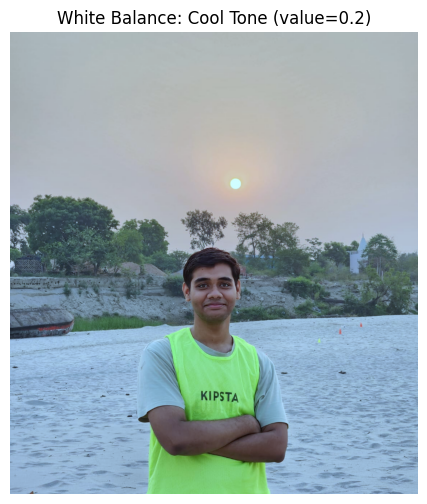

In [45]:
cool_balanced_image = white_balance(img_rgb, 0.2)

plt.figure(figsize=(6,6))
plt.imshow(cool_balanced_image)
plt.title('White Balance: Cool Tone (value=0.2)')
plt.axis('off')
plt.show()

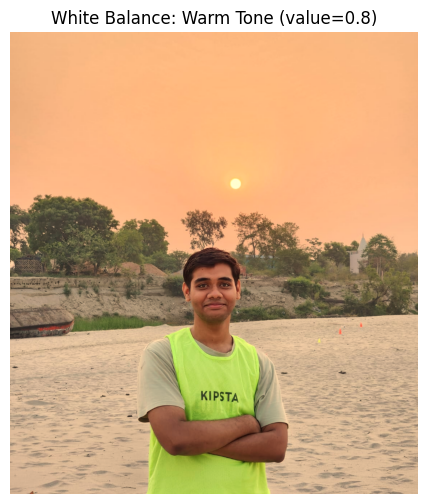

In [46]:
warm_balanced_image = white_balance(img_rgb, 0.8)

plt.figure(figsize=(6,6))
plt.imshow(warm_balanced_image)
plt.title('White Balance: Warm Tone (value=0.8)')
plt.axis('off')
plt.show()

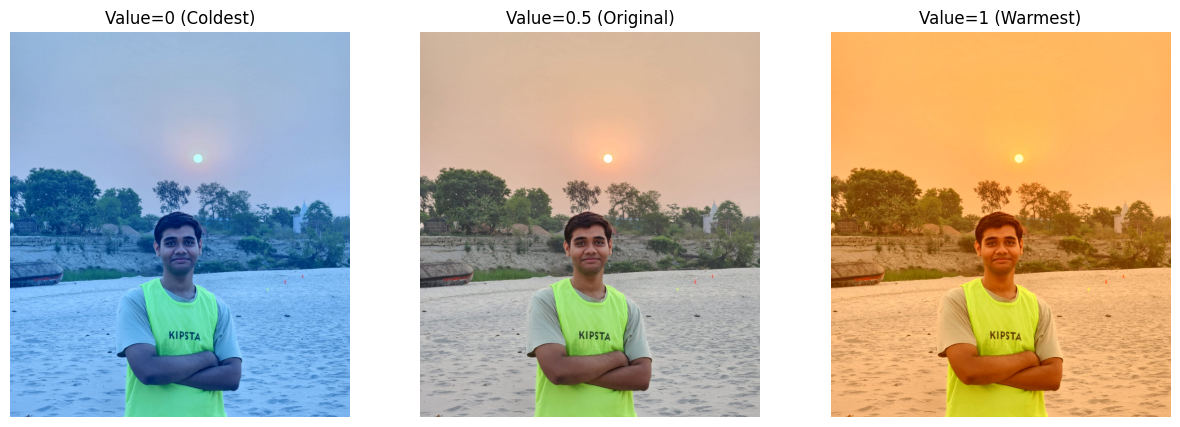

In [47]:
def white_balance(img_rgb, value):

    img_float = img_rgb.astype(np.float32)

    # Determine strength of effect (how far from 0.5)
    # Max shift value (e.g., adding 60 to pixel values)
    max_shift = 60.0

    if value < 0.5:
        # COLD range (0.0 to 0.5)
        # Factor goes from 1.0 (at value 0) to 0.0 (at value 0.5)
        factor = (0.5 - value) * 2

        # Add Blue, Subtract Red
        img_float[:, :, 2] += (max_shift * factor) # Boost Blue
        img_float[:, :, 0] -= (max_shift * factor) # Cut Red

    elif value > 0.5:
        # WARM range (0.5 to 1.0)
        # Factor goes from 0.0 (at value 0.5) to 1.0 (at value 1.0)
        factor = (value - 0.5) * 2

        # Add Red, Subtract Blue
        img_float[:, :, 0] += (max_shift * factor) # Boost Red
        img_float[:, :, 2] -= (max_shift * factor) # Cut Blue

    result = np.clip(img_float, 0, 255).astype(np.uint8)
    return result

coldest = white_balance(img_rgb, 0.0)
original = white_balance(img_rgb, 0.5)
warmest = white_balance(img_rgb, 1.0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(coldest); plt.title("Value=0 (Coldest)")
plt.axis('off')
plt.subplot(1,3,2); plt.imshow(original); plt.title("Value=0.5 (Original)")
plt.axis('off')
plt.subplot(1,3,3); plt.imshow(warmest); plt.title("Value=1 (Warmest)")
plt.axis('off')
plt.show()